In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
eegInfo=pd.read_json("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.json")

In [ ]:
print(eegInfo)

                   PowerLineFrequency         SoftwareFilters  \
FilterDescription                  50  {'Description': 'n/a'}   

                         EEGReference CapManufacturersModelName  \
FilterDescription  Between Cz and CPz              Quick-Cap 64   

                  CapManufacturer SoftwareVersions ManufacturersModelName  \
FilterDescription       Neuroscan          CURRY 8             SynAmps RT   

                  Manufacturer EEGPlacementScheme InstitutionalDepartmentName  \
FilterDescription    Neuroscan              10-20     Social Neuroscience Lab   

                                                     InstitutionName  \
FilterDescription  Institute of Psychology, Polish Academy of Sci...   

                   TaskName  EEGChannelCount RecordingType  RecordingDuration  \
FilterDescription  DotProbe               68    continuous           1499.001   

                   SamplingFrequency  EOGChannelCount  ECGChannelCount  \
FilterDescription               10

In [ ]:
df=pd.read_table("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_channels.tsv")

In [ ]:
df

,name,type,units
0,FP1,NaN,NaN
1,FPZ,NaN,NaN
2,FP2,NaN,NaN
3,AF3,NaN,NaN
4,AF4,NaN,NaN
...,...,...,...
63,CB2,NaN,NaN
64,HEO,NaN,NaN
65,VEO,NaN,NaN
66,EKG,NaN,NaN


In [ ]:
dfEvents=pd.read_table("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_events.tsv")

In [ ]:
dfEvents

,onset,duration,sample,value
0,1.078,NaN,1078,192
1,1.110,NaN,1110,200
2,9.213,NaN,9213,192
3,9.243,NaN,9243,200
4,14.293,NaN,14293,146
...,...,...,...,...
2883,1496.690,NaN,1496690,208
2884,1497.256,NaN,1497256,206
2885,1497.456,NaN,1497456,248
2886,1497.946,NaN,1497946,999


<Axes: >

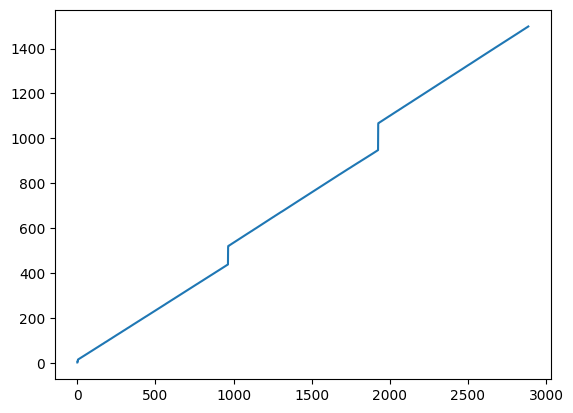

In [ ]:
dfEvents["onset"].plot()

<Axes: >

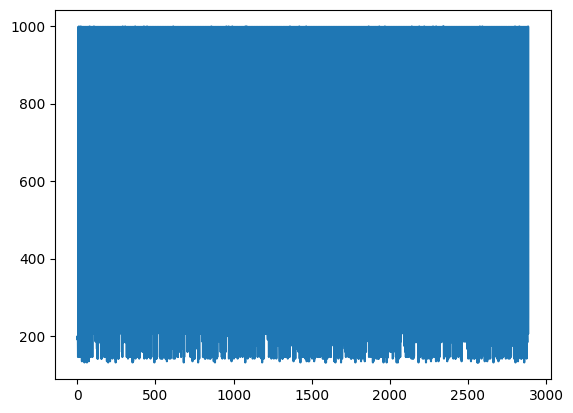

In [ ]:
dfEvents["value"].plot()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    68 non-null     object 
 1   type    0 non-null      float64
 2   units   0 non-null      float64
dtypes: float64(2), object(1)
memory usage: 1.7+ KB


In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 21.8 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import mne

In [ ]:
raw_data= mne.io.read_raw_eeglab("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H002/eeg/sub-H002_task-DotProbe_eeg.set", preload=False)
data=raw_data.to_data_frame()
data.info()
raw_data

Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H002/eeg/sub-H002_task-DotProbe_eeg.fdt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397001 entries, 0 to 1397000
Data columns (total 69 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   time    1397001 non-null  float64
 1   FP1     1397001 non-null  float64
 2   FPZ     1397001 non-null  float64
 3   FP2     1397001 non-null  float64
 4   AF3     1397001 non-null  float64
 5   AF4     1397001 non-null  float64
 6   F7      1397001 non-null  float64
 7   F5      1397001 non-null  float64
 8   F3      1397001 non-null  float64
 9   F1      1397001 non-null  float64
 10  FZ      1397001 non-null  float64
 11  F2      1397001 non-null  float64
 12  F4      1397001 non-null  float64
 13  F6      1397001 non-null  float64
 14  F8      1397001 non-null  float64
 15  FT7     1397001 non-null  float64
 16  FC5     1397001 non-null  float64
 17  FC3     1397001 non-null  floa

<RawEEGLAB | sub-H002_task-DotProbe_eeg.fdt, 68 x 1397001 (1397.0 s), ~94 kB, data not loaded>

In [ ]:
df1= data.loc[:,["FP1","FP2","FPZ"]]

In [ ]:
df1

,FP1,FP2,FPZ
0,-7662.868164,9354.305664,5142.692383
1,-7662.619629,9355.942383,5144.758789
2,-7660.531738,9355.598633,5144.302246
3,-7661.057129,9355.584961,5145.289062
4,-7659.578125,9357.261719,5145.720703
...,...,...,...
1396996,-9046.647461,9642.608398,6257.456543
1396997,-9045.242188,9642.816406,6259.500977
1396998,-9046.138672,9643.166016,6258.593262
1396999,-9046.897461,9641.751953,6255.818359


In [ ]:
df1['FP1'].max()

-7564.35546875

In [ ]:
df1['FP2'].max()

9980.7900390625

In [ ]:
df1['FPZ'].max()

6524.724609375

In [ ]:
import mne
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Method for plain data

In [ ]:
def plain_t(url):
    raw_data=mne.io.read_raw_eeglab(url, preload=False)
    data=raw_data.to_data_frame()
    data.columns
    return data['O1'],data['O2'],data['P7'],data['P8'],data['FP1'],data['FP2']

#Method for FFT and extracting Beta Waves

In [ ]:
def fft_proce(eeglab_file_path,name1,name2,Lfrequency,Ufrequency):
  #raw_data.compute_psd(fmax=50).plot(picks="data", exclude="bads")
  raw_data=mne.io.read_raw_eeglab(eeglab_file_path, preload=False)
  data=raw_data.to_data_frame()
  clist=list(data.columns)
  name_index1= clist.index(name1)
  name_index2= clist.index(name2)
  #p8= clist.index('P8')
  t=data["time"]
  eeg=data[name1]
  #plt.plot(eeg)
  #plt.plot(t,eeg)
  from scipy.fft import fft, fftfreq
  # Number of samples
  N =len(eeg)
  yf1 = fft(data.iloc[:,name_index1].values)
  yf2 = fft(data.iloc[:,name_index2].values)
  #yfp8 = fft(data.iloc[:,p8].values)
  #flist.append(yf)
  xf1 = fftfreq(N, 1/1000)
  xf2 = fftfreq(N, 1/1000)
  #xfp8 = fftfreq(N, 1/1000)
  if((len(xf1)==len(yf1))and(len(xf2)==len(yf2))):
    dfeeg1=pd.DataFrame({"freq":xf1,"eeg":yf1})  #for subject 1 P7 electrode
    dfeeg2=pd.DataFrame({"freq":xf2,"eeg":yf2}) # for subject 1 P8 electrode
    #extracting beta wave for P7
    pre_dfeeg1=dfeeg1[(dfeeg1['freq'] > Lfrequency)]
    final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
    pre_dfeeg2=dfeeg2[(dfeeg2['freq'] > Lfrequency)]
    final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]
    return final_dfeeg1,final_dfeeg2
#fft_proce("/content/drive/MyDrive/eeg_dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.set","P7","P8")

#method for plots

In [ ]:
def fft_plots(final_dfeeg1,final_dfeeg2,name1,name2):
    f, axs = plt.subplots(2,1, figsize=(12, 8))
    plt.subplot(2,1,1)
    plt.plot(final_dfeeg1['freq'], final_dfeeg1['eeg'])
    plt.title(f'{name1} plot')
    plt.subplot(2,1,2)
    plt.plot(final_dfeeg2['freq'], final_dfeeg2['eeg'])
    plt.title(f'{name2} plot')
    plt.show()

Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


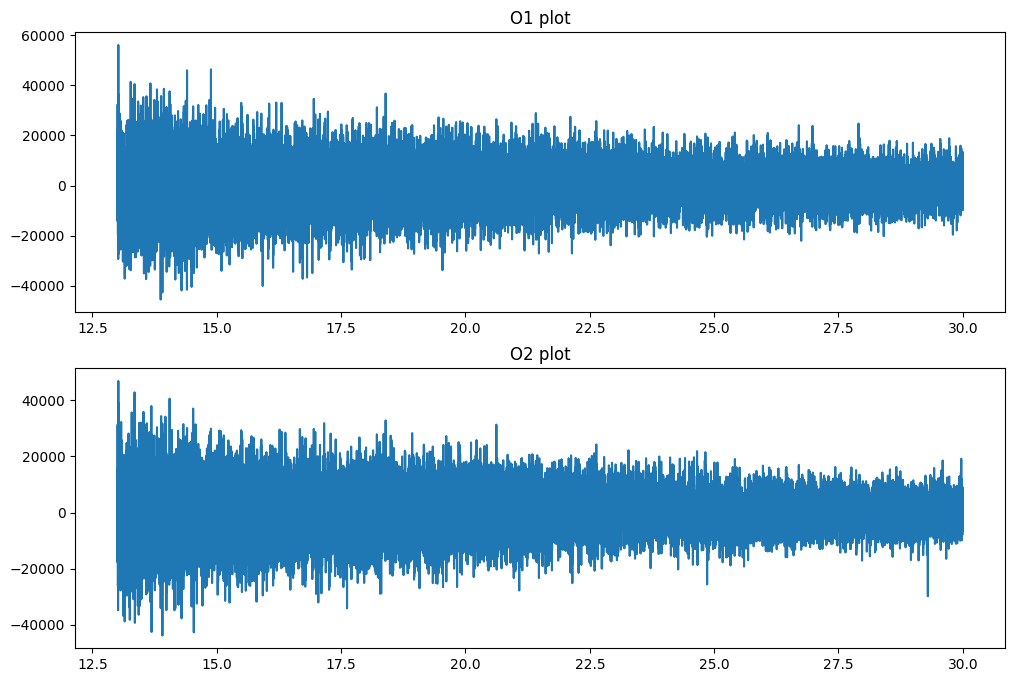

In [ ]:
o1,o2=fft_proce("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.set","O1","O2",13,30)
fft_plots(o1,o2,"O1","O2")

Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


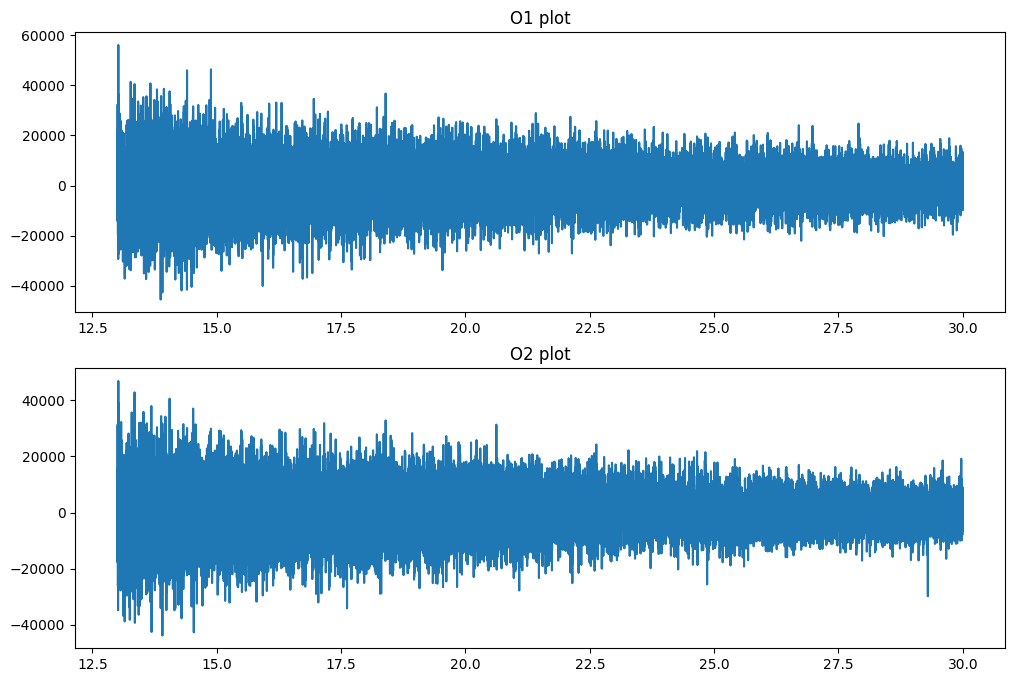

In [ ]:
o1,o2=fft_proce("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.set","O1","O2",13,30)
fft_plots(o1,o2,"O1","O2")

Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


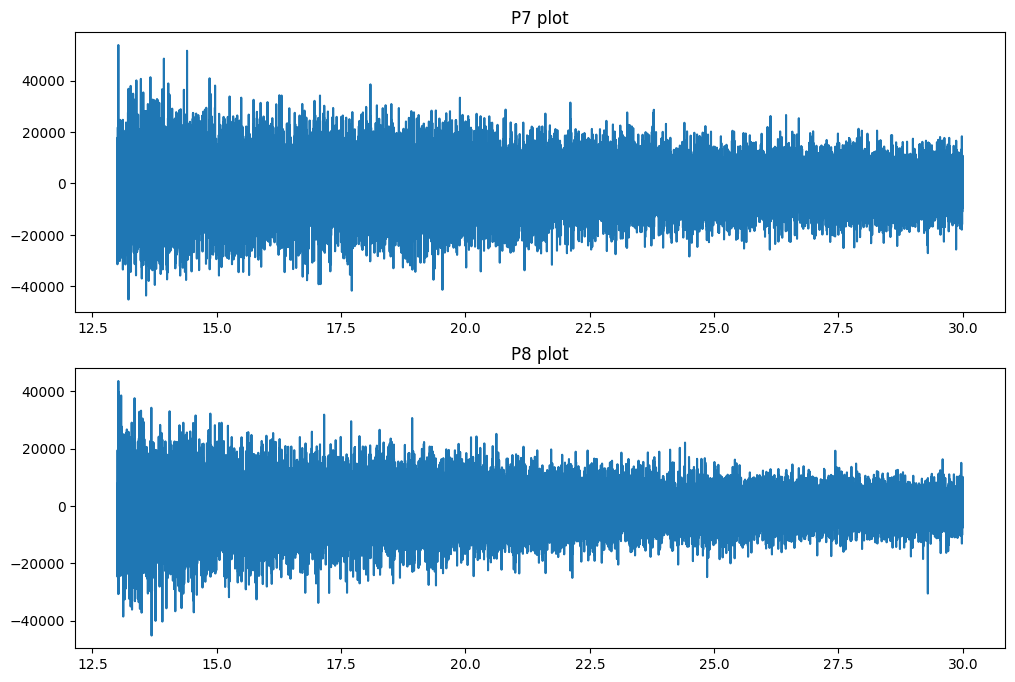

In [ ]:
P7,P8=fft_proce("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.set","P7","P8",13,30)
fft_plots(P7,P8,"P7","P8")

Interpolation of O1

Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.fdt
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499001 entries, 0 to 1499000
Data columns (total 69 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   time    1499001 non-null  float64
 1   FP1     1499001 non-null  float64
 2   FPZ     1499001 non-null  float64
 3   FP2     1499001 non-null  float64
 4   AF3     1499001 non-null  float64
 5   AF4     1499001 non-null  float64
 6   F7      1499001 non-null  float64
 7   F5      1499001 non-null  float64
 8   F3      1499001 non-null  float64
 9   F1      1499001 non-null  float64
 10  FZ      1499001 non-null  float64
 11  F2      1499001 non-null  float64
 12  F4      1499001 non-null  float64
 13  F6      1499001 non-null  float64
 14  F8      1499001 non-null  float64
 15  FT7     1499001 non-null  float64
 16  FC5     1499001 non-null  float64
 17  FC3     1499001 non-null  floa

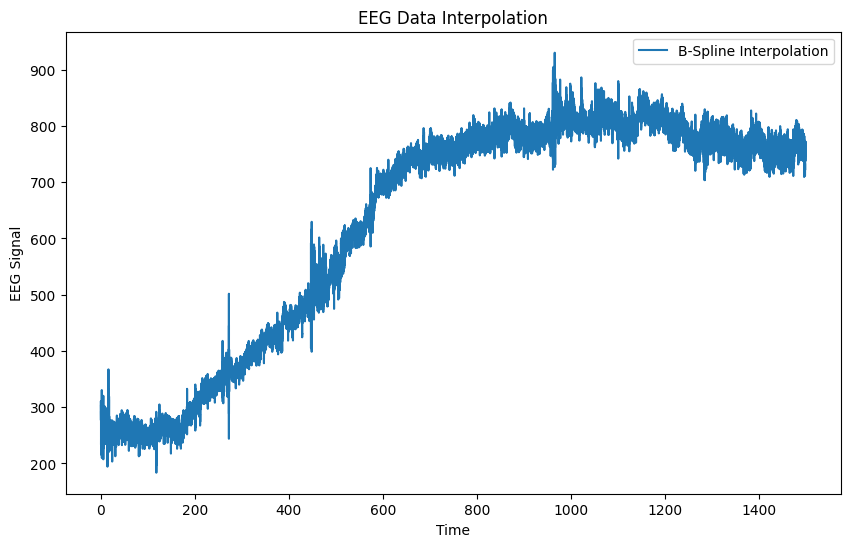

In [ ]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
raw_data=mne.io.read_raw_eeglab("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.set", preload=False)
data=raw_data.to_data_frame()
data.info()
# Sample EEG data
time_points = data.time.values
eeg_data =data.O1.values

# Define the new time points for interpolation 1499001
new_time_points = np.linspace(1, 10, 100)

# B-Spline interpolation
bspline = interpolate.make_interp_spline(time_points, eeg_data)
eeg_bspline = bspline(time_points)

# Cubic Spline interpolation
cubic_spline = interpolate.CubicSpline(time_points, eeg_data)
eeg_cubic_spline = cubic_spline(time_points)

# Plot the original EEG data and the interpolated data
plt.figure(figsize=(10, 6))
#plt.plot(time_points, eeg_data, 'o', label='Original EEG Data')
plt.plot(time_points, eeg_bspline, label='B-Spline Interpolation')
#plt.plot(new_time_points, eeg_cubic_spline, label='Cubic Spline Interpolation')
plt.xlabel('Time')
plt.ylabel('EEG Signal')
plt.legend()
plt.title('EEG Data Interpolation')
plt.show()

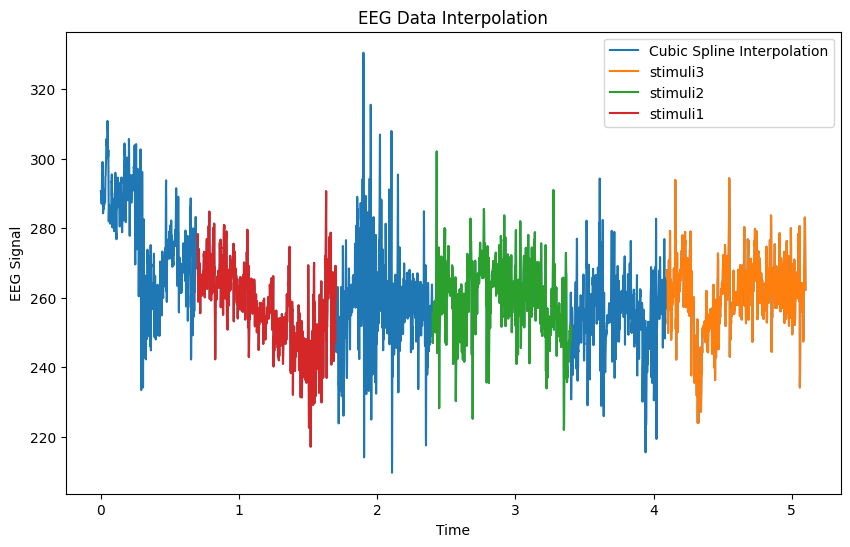

In [ ]:
plt.figure(figsize=(10, 6))
#plt.plot(time_points, eeg_data, 'o', label='Original EEG Data')
#plt.plot(new_time_points, eeg_bspline, label='B-Spline Interpolation')
plt.plot(time_points[:5100], eeg_cubic_spline[:5100], label='Cubic Spline Interpolation')
plt.plot(time_points[4100:5100], eeg_cubic_spline[4100:5100], label='stimuli3')
plt.plot(time_points[2400:3400], eeg_cubic_spline[2400:3400], label='stimuli2')
plt.plot(time_points[700:1700], eeg_cubic_spline[700:1700], label='stimuli1')
plt.xlabel('Time')
plt.ylabel('EEG Signal')
plt.legend()
plt.title('EEG Data Interpolation')
plt.show()

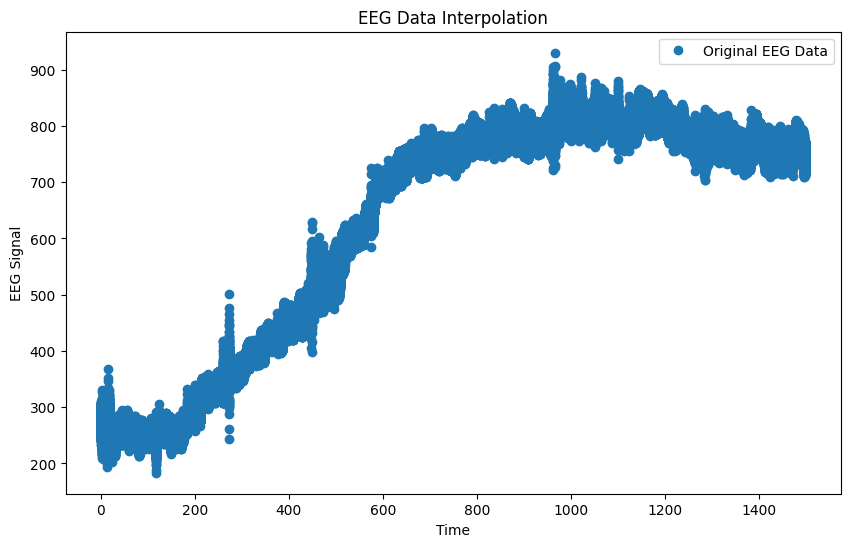

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(time_points, eeg_data, 'o', label='Original EEG Data')
#plt.plot(new_time_points, eeg_bspline, label='B-Spline Interpolation')
#plt.plot(new_time_points, eeg_cubic_spline, label='Cubic Spline Interpolation')
plt.xlabel('Time')
plt.ylabel('EEG Signal')
plt.legend()
plt.title('EEG Data Interpolation')
plt.show()

#Method which gives data for correlation

In [ ]:
def brain_synchro_corr(url,column1,column2,Lfrequency,Ufrequency):
    val1,val2=fft_proce(url,column1,column2,Lfrequency, Ufrequency)
    val1=abs(val1.values)
    val2=abs(val2.values)
    val1=pd.DataFrame(val1,columns=["x","y"])
    val2=pd.DataFrame(val2,columns=["x","y"])
    return val1["y"],val2["y"]

#Method combine the values in a region

In [ ]:
def corr_for_specific_region(url,Lfrequency,Ufrequency):
    corr_data=pd.DataFrame()
    val1,val2=brain_synchro_corr(url,"O1","O2",Lfrequency,Ufrequency)
    val3,val4=brain_synchro_corr(url,"P7","P8",Lfrequency,Ufrequency)
    val5,val6=brain_synchro_corr(url,"FP1","FP2",Lfrequency,Ufrequency)

    val1=val1.values
    val2=val2.values
    val3=val3.values
    val4=val4.values
    val5=val5.values
    val6=val6.values

    val1=val1.reshape(len(val1),1)
    val2=val2.reshape(len(val2),1)
    val3=val3.reshape(len(val3),1)
    val4=val4.reshape(len(val4),1)
    val5=val5.reshape(len(val5),1)
    val6=val6.reshape(len(val6),1)
    #print(val1.shape)
    #print(val2.shape)
    data_O_region=np.vstack((val1,val2))
    data_P_region=np.vstack((val3,val4))
    data_FP_region=np.vstack((val5,val6))

    data_O_region=data_O_region.reshape(len(data_O_region),)
    data_P_region=data_P_region.reshape(len(data_P_region),)
    data_FP_region=data_FP_region.reshape(len(data_FP_region),)
    #print(data.shape)
    corr_data["O_region"]=data_O_region
    corr_data["P_region"]=data_P_region
    corr_data["FP_region"]=data_FP_region
    return corr_data

#Method to find find out the correlation among the selected regions of all the subjects

In [ ]:
def final_dataframes_for_corr(Lfrequency,Ufrequency):
    O_data=pd.DataFrame()
    P_data=pd.DataFrame()
    FP_data=pd.DataFrame()
    a=[6,8,9,27]
    for i in range(1,31):
      if(i in a):
        continue
      print(f"plots for sample {i}")
      if(i<10):
        url_str=str("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H00"+str(i)+"/eeg/sub-H00"+str(i)+"_task-DotProbe_eeg.set")
        data=corr_for_specific_region(url_str,Lfrequency,Ufrequency)
        O_data["O_region_H"+str(i)]=data["O_region"]
        P_data["P_region_H"+str(i)]=data["P_region"]
        FP_data["FP_region_H"+str(i)]=data["FP_region"]
      else:
        url_str=str("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H0"+str(i)+"/eeg/sub-H0"+str(i)+"_task-DotProbe_eeg.set")
        data=corr_for_specific_region(url_str,Lfrequency,Ufrequency)
        O_data["O_region_H"+str(i)]=data["O_region"]
        P_data["P_region_H"+str(i)]=data["P_region"]
        FP_data["FP_region_H"+str(i)]=data["FP_region"]
    b=[4,6,8,9,10,11]
    for i in range(1,33):
      if(i in b):
        continue
      print(f"plots for sample {i}")
      if(i<10):
        url_str=str("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-L00"+str(i)+"/eeg/sub-L00"+str(i)+"_task-DotProbe_eeg.set")
        data=corr_for_specific_region(url_str,Lfrequency,Ufrequency)
        O_data["O_region_L"+str(i)]=data["O_region"]
        P_data["P_region_L"+str(i)]=data["P_region"]
        FP_data["FP_region_L"+str(i)]=data["FP_region"]
      else:
        url_str=str("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-L0"+str(i)+"/eeg/sub-L0"+str(i)+"_task-DotProbe_eeg.set")
        data=corr_for_specific_region(url_str,Lfrequency,Ufrequency)
        O_data["O_region_L"+str(i)]=data["O_region"]
        P_data["P_region_L"+str(i)]=data["P_region"]
        FP_data["FP_region_L"+str(i)]=data["FP_region"]
    return O_data,P_data,FP_data


In [ ]:
O_data,P_data,FP_data=final_dataframes_for_corr(13,30)

plots for sample 1
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 2
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H002/eeg/sub-H002_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H002/eeg/sub-H002_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H002/eeg/sub-H002_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 3
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H003/eeg/sub-H003_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H003/eeg/sub-H003_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H003/eeg/sub-H003_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 4
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H004/eeg/sub-H004_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H004/eeg/sub-H004_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H004/eeg/sub-H004_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 5
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H005/eeg/sub-H005_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H005/eeg/sub-H005_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H005/eeg/sub-H005_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 7
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H007/eeg/sub-H007_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H007/eeg/sub-H007_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H007/eeg/sub-H007_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 10
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H010/eeg/sub-H010_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H010/eeg/sub-H010_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H010/eeg/sub-H010_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 11
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H011/eeg/sub-H011_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H011/eeg/sub-H011_task-DotProbe_eeg.fdt
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H011/eeg/sub-H011_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 12
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H012/eeg/sub-H012_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H012/eeg/sub-H012_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H012/eeg/sub-H012_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 13
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H013/eeg/sub-H013_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H013/eeg/sub-H013_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H013/eeg/sub-H013_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 14
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H014/eeg/sub-H014_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H014/eeg/sub-H014_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H014/eeg/sub-H014_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 15
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H015/eeg/sub-H015_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H015/eeg/sub-H015_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H015/eeg/sub-H015_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 16
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H016/eeg/sub-H016_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H016/eeg/sub-H016_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H016/eeg/sub-H016_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 17
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H017/eeg/sub-H017_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H017/eeg/sub-H017_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H017/eeg/sub-H017_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 18
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H018/eeg/sub-H018_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H018/eeg/sub-H018_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H018/eeg/sub-H018_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 19
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H019/eeg/sub-H019_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H019/eeg/sub-H019_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H019/eeg/sub-H019_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 20
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H020/eeg/sub-H020_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H020/eeg/sub-H020_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H020/eeg/sub-H020_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 21
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H021/eeg/sub-H021_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H021/eeg/sub-H021_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H021/eeg/sub-H021_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 22
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H022/eeg/sub-H022_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H022/eeg/sub-H022_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H022/eeg/sub-H022_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 23
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H023/eeg/sub-H023_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H023/eeg/sub-H023_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H023/eeg/sub-H023_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 24
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H024/eeg/sub-H024_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H024/eeg/sub-H024_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H024/eeg/sub-H024_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 25
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H025/eeg/sub-H025_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H025/eeg/sub-H025_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H025/eeg/sub-H025_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 26
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H026/eeg/sub-H026_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H026/eeg/sub-H026_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H026/eeg/sub-H026_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 28
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H028/eeg/sub-H028_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H028/eeg/sub-H028_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H028/eeg/sub-H028_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 29
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H029/eeg/sub-H029_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H029/eeg/sub-H029_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H029/eeg/sub-H029_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 30
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H030/eeg/sub-H030_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H030/eeg/sub-H030_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H030/eeg/sub-H030_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 1
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L001/eeg/sub-L001_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L001/eeg/sub-L001_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L001/eeg/sub-L001_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 2
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L002/eeg/sub-L002_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L002/eeg/sub-L002_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L002/eeg/sub-L002_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 3
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L003/eeg/sub-L003_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L003/eeg/sub-L003_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L003/eeg/sub-L003_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 5
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L005/eeg/sub-L005_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L005/eeg/sub-L005_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L005/eeg/sub-L005_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 7
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L007/eeg/sub-L007_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L007/eeg/sub-L007_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L007/eeg/sub-L007_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 12
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L012/eeg/sub-L012_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L012/eeg/sub-L012_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L012/eeg/sub-L012_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 13
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L013/eeg/sub-L013_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L013/eeg/sub-L013_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L013/eeg/sub-L013_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 14
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L014/eeg/sub-L014_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L014/eeg/sub-L014_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L014/eeg/sub-L014_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 15
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L015/eeg/sub-L015_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L015/eeg/sub-L015_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L015/eeg/sub-L015_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 16
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L016/eeg/sub-L016_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L016/eeg/sub-L016_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L016/eeg/sub-L016_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 17
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L017/eeg/sub-L017_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L017/eeg/sub-L017_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L017/eeg/sub-L017_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 18
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L018/eeg/sub-L018_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L018/eeg/sub-L018_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L018/eeg/sub-L018_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 19
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L019/eeg/sub-L019_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L019/eeg/sub-L019_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L019/eeg/sub-L019_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 20
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L020/eeg/sub-L020_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L020/eeg/sub-L020_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L020/eeg/sub-L020_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 21
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L021/eeg/sub-L021_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L021/eeg/sub-L021_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L021/eeg/sub-L021_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 22
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L022/eeg/sub-L022_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L022/eeg/sub-L022_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L022/eeg/sub-L022_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 23
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L023/eeg/sub-L023_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L023/eeg/sub-L023_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L023/eeg/sub-L023_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 24
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L024/eeg/sub-L024_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L024/eeg/sub-L024_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L024/eeg/sub-L024_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 25
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L025/eeg/sub-L025_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L025/eeg/sub-L025_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L025/eeg/sub-L025_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 26
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L026/eeg/sub-L026_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L026/eeg/sub-L026_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L026/eeg/sub-L026_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 27
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L027/eeg/sub-L027_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L027/eeg/sub-L027_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L027/eeg/sub-L027_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 28
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L028/eeg/sub-L028_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L028/eeg/sub-L028_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L028/eeg/sub-L028_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 29
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L029/eeg/sub-L029_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L029/eeg/sub-L029_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L029/eeg/sub-L029_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 30
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L030/eeg/sub-L030_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L030/eeg/sub-L030_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L030/eeg/sub-L030_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 31
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L031/eeg/sub-L031_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L031/eeg/sub-L031_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L031/eeg/sub-L031_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 32
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L032/eeg/sub-L032_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L032/eeg/sub-L032_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L032/eeg/sub-L032_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


#Pearson correlation within subject

In [ ]:
#Linear
O_data_corr_p=O_data.corr()
P_data_corr_p=P_data.corr()
FP_data_corr_p=FP_data.corr()

In [ ]:
O_data_corr_p

,O_region_H1,O_region_H2,O_region_H3,O_region_H4,O_region_H5,O_region_H7,O_region_H10,O_region_H11,O_region_H12,O_region_H13,...,O_region_L23,O_region_L24,O_region_L25,O_region_L26,O_region_L27,O_region_L28,O_region_L29,O_region_L30,O_region_L31,O_region_L32
O_region_H1,1.000000,0.207740,0.194180,0.219931,0.180188,0.140291,0.199729,0.105986,0.187023,0.081893,...,0.138777,0.113640,0.249059,0.068248,0.211723,0.205319,0.183068,0.107342,0.180174,0.116043
O_region_H2,0.207740,1.000000,0.319499,0.274837,0.244644,0.250476,0.266210,0.164295,0.242056,0.019660,...,0.173775,0.083243,0.304383,0.087721,0.303113,0.208000,0.288905,0.096012,0.188425,0.130263
O_region_H3,0.194180,0.319499,1.000000,0.269586,0.161913,0.184786,0.237315,0.171759,0.299159,-0.018164,...,0.193810,0.071179,0.311548,0.012600,0.269643,0.188696,0.234443,0.104419,0.190545,0.156841
O_region_H4,0.219931,0.274837,0.269586,1.000000,0.264973,0.205128,0.318151,0.137605,0.227775,0.129143,...,0.175164,0.173824,0.306487,0.106467,0.317512,0.241259,0.265622,0.136710,0.190792,0.142068
O_region_H5,0.180188,0.244644,0.161913,0.264973,1.000000,0.245915,0.262947,0.069292,0.022946,0.162552,...,0.087800,0.137265,0.221323,0.253927,0.268105,0.209778,0.279617,0.059831,0.127174,0.059391
O_region_H7,0.140291,0.250476,0.184786,0.205128,0.245915,1.000000,0.205823,0.092473,0.076062,0.089390,...,0.101216,0.090935,0.182643,0.152560,0.235393,0.164588,0.227849,0.045157,0.105118,0.058278
O_region_H10,0.199729,0.266210,0.237315,0.318151,0.262947,0.205823,1.000000,0.103226,0.185267,0.116303,...,0.151878,0.141478,0.277805,0.130676,0.301327,0.225588,0.258158,0.111504,0.170076,0.106725
O_region_H11,0.105986,0.164295,0.171759,0.137605,0.069292,0.092473,0.103226,1.000000,0.187442,-0.017571,...,0.110730,0.049405,0.167610,-0.015814,0.142168,0.086970,0.113944,0.055187,0.110661,0.083431
O_region_H12,0.187023,0.242056,0.299159,0.227775,0.022946,0.076062,0.185267,0.187442,1.000000,-0.064661,...,0.207169,0.066410,0.296641,-0.107774,0.206241,0.145028,0.149008,0.124829,0.193767,0.166160
O_region_H13,0.081893,0.019660,-0.018164,0.129143,0.162552,0.089390,0.116303,-0.017571,-0.064661,1.000000,...,-0.012850,0.187883,0.039590,0.140475,0.113166,0.130972,0.072519,0.078156,0.062909,-0.021656


In [ ]:
P_data_corr_p


,P_region_H1,P_region_H2,P_region_H3,P_region_H4,P_region_H5,P_region_H7,P_region_H10,P_region_H11,P_region_H12,P_region_H13,...,P_region_L23,P_region_L24,P_region_L25,P_region_L26,P_region_L27,P_region_L28,P_region_L29,P_region_L30,P_region_L31,P_region_L32
P_region_H1,1.000000,0.317860,0.134622,0.299106,0.367760,0.278315,0.239807,0.101190,0.296825,0.209290,...,0.244773,0.051670,0.277218,0.087897,0.264183,0.217562,0.228976,0.110652,0.143963,0.205170
P_region_H2,0.317860,1.000000,0.195284,0.380437,0.538333,0.389437,0.253117,0.149737,0.432238,0.192179,...,0.336752,-0.032090,0.320908,0.061420,0.298710,0.185098,0.289899,0.080820,0.106377,0.219286
P_region_H3,0.134622,0.195284,1.000000,0.195846,0.067457,0.174357,0.259513,0.140331,0.103389,0.063670,...,0.158713,0.059884,0.213113,0.117283,0.304988,0.147395,0.245780,0.024380,0.084767,0.132636
P_region_H4,0.299106,0.380437,0.195846,1.000000,0.423273,0.318149,0.293283,0.129543,0.349069,0.208993,...,0.285580,0.053679,0.317550,0.097648,0.309461,0.208410,0.276108,0.101647,0.133409,0.237667
P_region_H5,0.367760,0.538333,0.067457,0.423273,1.000000,0.422085,0.212130,0.112463,0.517652,0.253310,...,0.357532,-0.038226,0.318472,0.031323,0.232852,0.187933,0.245142,0.108224,0.113923,0.247110
P_region_H7,0.278315,0.389437,0.174357,0.318149,0.422085,1.000000,0.237729,0.131817,0.346877,0.172715,...,0.272034,0.006328,0.271723,0.072459,0.263305,0.171562,0.250286,0.076353,0.109876,0.190506
P_region_H10,0.239807,0.253117,0.259513,0.293283,0.212130,0.237729,1.000000,0.122275,0.198051,0.156653,...,0.207236,0.116238,0.289324,0.142262,0.354234,0.226583,0.288181,0.089398,0.150043,0.207114
P_region_H11,0.101190,0.149737,0.140331,0.129543,0.112463,0.131817,0.122275,1.000000,0.109970,0.063131,...,0.113085,0.033900,0.132611,0.054300,0.155123,0.078582,0.133652,0.021327,0.061406,0.076148
P_region_H12,0.296825,0.432238,0.103389,0.349069,0.517652,0.346877,0.198051,0.109970,1.000000,0.189030,...,0.298576,-0.027546,0.274341,0.029281,0.233883,0.156649,0.217961,0.079015,0.094501,0.195591
P_region_H13,0.209290,0.192179,0.063670,0.208993,0.253310,0.172715,0.156653,0.063131,0.189030,1.000000,...,0.145989,0.073750,0.179703,0.057347,0.162854,0.149137,0.131195,0.103742,0.113647,0.149625


In [ ]:
FP_data_corr_p


,FP_region_H1,FP_region_H2,FP_region_H3,FP_region_H4,FP_region_H5,FP_region_H7,FP_region_H10,FP_region_H11,FP_region_H12,FP_region_H13,...,FP_region_L23,FP_region_L24,FP_region_L25,FP_region_L26,FP_region_L27,FP_region_L28,FP_region_L29,FP_region_L30,FP_region_L31,FP_region_L32
FP_region_H1,1.000000,0.247558,0.196209,0.208130,0.185075,0.134969,0.229525,0.008213,0.135570,0.122738,...,0.077635,0.042547,0.218051,0.228199,0.227480,0.052267,0.117942,0.032909,0.153062,0.092576
FP_region_H2,0.247558,1.000000,0.181751,0.195859,0.155679,0.157967,0.204340,0.032764,0.150613,0.071108,...,0.089780,0.013570,0.166687,0.198926,0.222640,0.046584,0.129495,0.006248,0.084657,0.060113
FP_region_H3,0.196209,0.181751,1.000000,0.154827,0.118287,0.118461,0.170269,0.026766,0.117065,0.056292,...,0.064137,0.021966,0.124065,0.145452,0.168383,0.040729,0.091476,0.002791,0.078296,0.060157
FP_region_H4,0.208130,0.195859,0.154827,1.000000,0.132332,0.148133,0.223127,0.026960,0.147072,0.086341,...,0.143155,-0.011749,0.144793,0.179340,0.205126,0.067654,0.135777,0.007218,0.075244,0.067859
FP_region_H5,0.185075,0.155679,0.118287,0.132332,1.000000,0.076512,0.130614,0.015958,0.092462,0.044883,...,0.039803,0.033938,0.126160,0.141442,0.125967,0.035646,0.083398,0.007005,0.076231,0.070688
FP_region_H7,0.134969,0.157967,0.118461,0.148133,0.076512,1.000000,0.134847,0.024556,0.119560,0.048987,...,0.108309,-0.011959,0.094351,0.121330,0.143785,0.032970,0.095792,0.003541,0.039013,0.030696
FP_region_H10,0.229525,0.204340,0.170269,0.223127,0.130614,0.134847,1.000000,0.021706,0.148959,0.095440,...,0.097344,-0.008563,0.158989,0.171910,0.249938,0.079142,0.127634,0.019343,0.095101,0.068265
FP_region_H11,0.008213,0.032764,0.026766,0.026960,0.015958,0.024556,0.021706,1.000000,0.029773,-0.010209,...,0.020745,0.010506,0.025177,0.020924,0.022205,0.000258,0.027279,-0.003357,-0.004401,0.024198
FP_region_H12,0.135570,0.150613,0.117065,0.147072,0.092462,0.119560,0.148959,0.029773,1.000000,0.040610,...,0.096174,-0.003058,0.091653,0.120426,0.147451,0.042049,0.111024,-0.001182,0.035046,0.036628
FP_region_H13,0.122738,0.071108,0.056292,0.086341,0.044883,0.048987,0.095440,-0.010209,0.040610,1.000000,...,0.051636,-0.004280,0.073269,0.082610,0.093231,0.043149,0.034040,0.032908,0.064304,0.031661


#spearman Correlation

In [ ]:
#Monotonic
O_data_corr_sp=O_data.corr(method='spearman')
P_data_corr_sp=P_data.corr(method='spearman')
FP_data_corr_sp=FP_data.corr(method='spearman')

In [ ]:
O_data_corr_sp

,O_region_H1,O_region_H2,O_region_H3,O_region_H4,O_region_H5,O_region_H7,O_region_H10,O_region_H11,O_region_H12,O_region_H13,...,O_region_L23,O_region_L24,O_region_L25,O_region_L26,O_region_L27,O_region_L28,O_region_L29,O_region_L30,O_region_L31,O_region_L32
O_region_H1,1.000000,0.187122,0.177434,0.231388,0.160462,0.128117,0.202049,0.085283,0.162370,0.071506,...,0.118190,0.095778,0.233682,0.053368,0.209807,0.180822,0.158641,0.101891,0.154270,0.109243
O_region_H2,0.187122,1.000000,0.280383,0.285765,0.215518,0.219163,0.271074,0.137267,0.214477,0.025161,...,0.157278,0.070896,0.282612,0.074463,0.304887,0.190727,0.245838,0.087886,0.161175,0.123325
O_region_H3,0.177434,0.280383,1.000000,0.267565,0.128250,0.156404,0.233496,0.143024,0.283076,-0.023925,...,0.173480,0.047581,0.304036,-0.008514,0.264474,0.162705,0.195403,0.092338,0.166509,0.149410
O_region_H4,0.231388,0.285765,0.267565,1.000000,0.279771,0.215921,0.349112,0.124557,0.208524,0.139618,...,0.164843,0.170398,0.320272,0.108834,0.349127,0.252570,0.270043,0.134104,0.183227,0.145735
O_region_H5,0.160462,0.215518,0.128250,0.279771,1.000000,0.235270,0.261612,0.053744,0.000259,0.173332,...,0.070530,0.137793,0.190426,0.230274,0.270154,0.198088,0.250768,0.062466,0.101691,0.048059
O_region_H7,0.128117,0.219163,0.156404,0.215921,0.235270,1.000000,0.207044,0.076002,0.059609,0.090777,...,0.088884,0.087173,0.163200,0.135012,0.240361,0.155990,0.207196,0.043891,0.085878,0.050558
O_region_H10,0.202049,0.271074,0.233496,0.349112,0.261612,0.207044,1.000000,0.094841,0.173956,0.118337,...,0.143922,0.132092,0.276547,0.123626,0.319445,0.224859,0.253535,0.104624,0.156022,0.107059
O_region_H11,0.085283,0.137267,0.143024,0.124557,0.053744,0.076002,0.094841,1.000000,0.158476,-0.017714,...,0.087981,0.034405,0.144966,-0.018168,0.128611,0.069625,0.089126,0.041437,0.082557,0.069461
O_region_H12,0.162370,0.214477,0.283076,0.208524,0.000259,0.059609,0.173956,0.158476,1.000000,-0.079983,...,0.183881,0.037202,0.282951,-0.115969,0.191117,0.118224,0.115836,0.104036,0.170330,0.155348
O_region_H13,0.071506,0.025161,-0.023925,0.139618,0.173332,0.090777,0.118337,-0.017714,-0.079983,1.000000,...,-0.015674,0.176765,0.012568,0.132475,0.116343,0.125762,0.088478,0.070742,0.034294,-0.026780


In [ ]:
#O_data_corr_sp.iloc[0] for 0th row
#O_data_corr_sp.iloc[:1] for 1st column
#by default correlation function uses pearson correlation function
#pearson and spearman within one subject for all regions

In [ ]:
P_data_corr_sp

,P_region_H1,P_region_H2,P_region_H3,P_region_H4,P_region_H5,P_region_H7,P_region_H10,P_region_H11,P_region_H12,P_region_H13,...,P_region_L23,P_region_L24,P_region_L25,P_region_L26,P_region_L27,P_region_L28,P_region_L29,P_region_L30,P_region_L31,P_region_L32
P_region_H1,1.000000,0.300422,0.139428,0.286870,0.334215,0.249649,0.244359,0.089951,0.280629,0.182506,...,0.224680,0.039329,0.258323,0.068850,0.273785,0.191096,0.204274,0.098097,0.112575,0.196780
P_region_H2,0.300422,1.000000,0.151437,0.383544,0.564645,0.375564,0.232298,0.127450,0.465531,0.165439,...,0.337793,-0.061049,0.299419,0.026897,0.309581,0.157541,0.240528,0.054830,0.059273,0.206917
P_region_H3,0.139428,0.151437,1.000000,0.181769,0.062429,0.165875,0.257754,0.109932,0.102865,0.081165,...,0.138400,0.070671,0.199603,0.101898,0.294508,0.147496,0.212784,0.040541,0.082619,0.135105
P_region_H4,0.286870,0.383544,0.181769,1.000000,0.421195,0.298885,0.294778,0.114812,0.355330,0.185545,...,0.275484,0.029143,0.302853,0.070302,0.326197,0.193168,0.243642,0.085778,0.101530,0.234149
P_region_H5,0.334215,0.564645,0.062429,0.421195,1.000000,0.394298,0.192978,0.094267,0.530846,0.208997,...,0.349867,-0.066075,0.296348,-0.006726,0.245617,0.155639,0.197387,0.080732,0.064803,0.231930
P_region_H7,0.249649,0.375564,0.165875,0.298885,0.394298,1.000000,0.232794,0.116314,0.332479,0.143645,...,0.249743,-0.000352,0.252014,0.055669,0.280106,0.154017,0.218269,0.061580,0.075350,0.175702
P_region_H10,0.244359,0.232298,0.257754,0.294778,0.192978,0.232794,1.000000,0.114964,0.192390,0.156819,...,0.197644,0.109666,0.286651,0.132237,0.381398,0.224475,0.277861,0.092123,0.131147,0.216983
P_region_H11,0.089951,0.127450,0.109932,0.114812,0.094267,0.116314,0.114964,1.000000,0.098726,0.052594,...,0.096214,0.030406,0.111608,0.046075,0.147024,0.067872,0.111473,0.020653,0.044819,0.065734
P_region_H12,0.280629,0.465531,0.102865,0.355330,0.530846,0.332479,0.192390,0.098726,1.000000,0.162675,...,0.298027,-0.044823,0.266661,0.011121,0.255641,0.138627,0.191155,0.058154,0.061792,0.190423
P_region_H13,0.182506,0.165439,0.081165,0.185545,0.208997,0.143645,0.156819,0.052594,0.162675,1.000000,...,0.120908,0.061285,0.160097,0.045597,0.169642,0.135505,0.115788,0.088459,0.086425,0.142884


In [ ]:
FP_data_corr_sp

,FP_region_H1,FP_region_H2,FP_region_H3,FP_region_H4,FP_region_H5,FP_region_H7,FP_region_H10,FP_region_H11,FP_region_H12,FP_region_H13,...,FP_region_L23,FP_region_L24,FP_region_L25,FP_region_L26,FP_region_L27,FP_region_L28,FP_region_L29,FP_region_L30,FP_region_L31,FP_region_L32
FP_region_H1,1.000000,0.222407,0.174865,0.202527,0.177102,0.119443,0.229873,0.008110,0.120362,0.103599,...,0.064910,0.042242,0.206550,0.194851,0.226386,0.057621,0.109184,0.031908,0.139637,0.089165
FP_region_H2,0.222407,1.000000,0.164274,0.185364,0.150968,0.135713,0.205092,0.029620,0.131195,0.059619,...,0.077016,0.020395,0.149598,0.168110,0.215695,0.051463,0.119267,0.002696,0.071956,0.062488
FP_region_H3,0.174865,0.164274,1.000000,0.140797,0.110877,0.105366,0.165163,0.026673,0.101040,0.042607,...,0.049558,0.024227,0.118654,0.124910,0.165028,0.038600,0.082909,0.001648,0.070134,0.060054
FP_region_H4,0.202527,0.185364,0.140797,1.000000,0.133877,0.135820,0.224698,0.025750,0.130471,0.080122,...,0.135475,-0.010627,0.145696,0.167030,0.208969,0.065150,0.126073,0.009835,0.072454,0.066349
FP_region_H5,0.177102,0.150968,0.110877,0.133877,1.000000,0.074713,0.139344,0.015498,0.087165,0.038292,...,0.039488,0.032495,0.131551,0.134531,0.137083,0.042014,0.087389,0.002513,0.073499,0.067844
FP_region_H7,0.119443,0.135713,0.105366,0.135820,0.074713,1.000000,0.128879,0.021812,0.098334,0.040659,...,0.100341,-0.008545,0.082528,0.106857,0.136916,0.033113,0.086965,0.005652,0.032208,0.028136
FP_region_H10,0.229873,0.205092,0.165163,0.224698,0.139344,0.128879,1.000000,0.025222,0.143018,0.082842,...,0.104665,-0.000934,0.161619,0.170216,0.249664,0.075542,0.125817,0.019321,0.091700,0.073274
FP_region_H11,0.008110,0.029620,0.026673,0.025750,0.015498,0.021812,0.025222,1.000000,0.029208,-0.007489,...,0.018909,0.009940,0.024528,0.023513,0.024829,0.000245,0.025893,-0.004748,-0.006101,0.022417
FP_region_H12,0.120362,0.131195,0.101040,0.130471,0.087165,0.098334,0.143018,0.029208,1.000000,0.031946,...,0.086778,-0.001294,0.085121,0.106116,0.141664,0.042140,0.097164,-0.003233,0.031213,0.033973
FP_region_H13,0.103599,0.059619,0.042607,0.080122,0.038292,0.040659,0.082842,-0.007489,0.031946,1.000000,...,0.047922,-0.000365,0.060585,0.066561,0.083601,0.035972,0.032934,0.029008,0.054583,0.027391


In [ ]:
O_data_corr_p.O_region_H1

O_region_H1     1.000000
O_region_H2     0.207740
O_region_H3     0.194180
O_region_H4     0.219931
O_region_H5     0.180188
O_region_H7     0.140291
O_region_H10    0.199729
O_region_H11    0.105986
O_region_H12    0.187023
O_region_H13    0.081893
O_region_H14    0.074599
O_region_H15    0.256598
O_region_H16    0.017159
O_region_H17    0.174068
O_region_H18    0.187541
O_region_H19    0.026209
O_region_H20    0.219961
O_region_H21    0.046135
O_region_H22    0.205575
O_region_H23    0.106259
O_region_H24    0.185200
O_region_H25    0.129891
O_region_H26    0.021887
O_region_H28    0.117250
O_region_H29    0.003764
O_region_H30    0.231871
O_region_L1     0.199523
O_region_L2     0.240660
O_region_L3     0.200050
O_region_L5     0.212391
O_region_L7     0.157113
O_region_L12    0.209491
O_region_L13    0.084751
O_region_L14    0.026963
O_region_L15    0.168278
O_region_L16    0.133221
O_region_L17    0.027264
O_region_L18    0.159842
O_region_L19    0.221184
O_region_L20    0.137170


In [ ]:
O_data_corr_sp.O_region_H1

O_region_H1     1.000000
O_region_H2     0.187122
O_region_H3     0.177434
O_region_H4     0.231388
O_region_H5     0.160462
O_region_H7     0.128117
O_region_H10    0.202049
O_region_H11    0.085283
O_region_H12    0.162370
O_region_H13    0.071506
O_region_H14    0.069441
O_region_H15    0.228251
O_region_H16    0.023531
O_region_H17    0.161539
O_region_H18    0.165218
O_region_H19    0.020569
O_region_H20    0.202757
O_region_H21    0.040901
O_region_H22    0.193777
O_region_H23    0.075685
O_region_H24    0.164613
O_region_H25    0.111474
O_region_H26    0.019514
O_region_H28    0.093580
O_region_H29    0.003513
O_region_H30    0.206047
O_region_L1     0.179687
O_region_L2     0.215451
O_region_L3     0.182713
O_region_L5     0.189255
O_region_L7     0.131794
O_region_L12    0.185224
O_region_L13    0.074841
O_region_L14    0.017439
O_region_L15    0.160511
O_region_L16    0.113074
O_region_L17    0.024474
O_region_L18    0.156387
O_region_L19    0.205567
O_region_L20    0.120045


In [ ]:
def correlation_region(corr_data1,corr_data2,threshold,col_value):
    corr_data1=corr_data1[corr_data1!=1]
    corr_data2=corr_data2[corr_data2!=1]



    corr_data1[:] = np.tril(corr_data1.values, k=-1)
    corr_data2[:] = np.tril(corr_data2.values, k=-1)



    final_corr_data1=corr_data1.values
    final_corr_data2=corr_data2.values


    if(col_value=='Data_p'):
        corr_data_index=np.where(final_corr_data1>=threshold)
    elif(col_value=='Data_sp'):
        corr_data_index=np.where(final_corr_data1>=threshold)


    else:
        print("Please enter proper column name")

    corr_vals1=final_corr_data1[corr_data_index]
    corr_vals2=final_corr_data2[corr_data_index]



    corr_data_index=list(corr_data_index)
    myarr=np.array(corr_data_index)
    len(corr_data_index)
    final_corr_data=pd.DataFrame(myarr[0].T,columns=["rows"])
    final_corr_data["cols"]=myarr[1].T
    final_corr_data["Data_p"]=corr_vals1
    final_corr_data["Data_sp"]=corr_vals2


    final_corr_data
    dict={0:"smaple_H1",1:"sample_H2",2:"smaple_H3",3:"sample_H4",4:"smaple_H5",5:"sample_H7",6:"smaple_H10",7:"sample_H11",8:"smaple_H12",9:"sample_H13"
          ,10:"smaple_H14",11:"sample_H15",12:"smaple_H16",13:"sample_H17",14:"smaple_H18",15:"sample_H19",16:"smaple_H20",17:"sample_H21",18:"smaple_H22"
          ,19:"sample_H23",20:"smaple_H24",21:"sample_H25",22:"smaple_H26",23:"sample_H28",24:"smaple_H29",25:"sample_H30",26:"smaple_L1",27:"smaple_L2"
          ,28:"smaple_L3",29:"smaple_L5",30:"smaple_L7",31:"smaple_L12",32:"smaple_L13",33:"smaple_L14",34:"smaple_L15",35:"smaple_L16",36:"smaple_L17"
          ,37:"smaple_L18",38:"smaple_L19",39:"smaple_L20",40:"smaple_L21",41:"smaple_L22",42:"smaple_L23",43:"smaple_L24",44:"smaple_L25",45:"smaple_L26"
          ,46:"smaple_L27",47:"smaple_L28",48:"smaple_L29",49:"smaple_L30",50:"smaple_L31",51:"smaple_L32"}
    final_corr_data["rows"] = final_corr_data["rows"].map(dict)
    final_corr_data["cols"] = final_corr_data["cols"].map(dict)
    return final_corr_data

In [ ]:
comparing_correlation_region=correlation_region(O_data_corr_p,O_data_corr_sp,0.5,"Data_p")

#Method for final dataframe to find  correlation on processed data among all the samples

In [ ]:
def final_dataframes_for_corr(column1,column2,Lfrequency,Ufrequency):
    val1_data=pd.DataFrame()
    val2_data=pd.DataFrame()
    a=[6,8,9,27]
    for i in range(1,31):
      if(i in a):
        continue
      print(f"plots for sample {i}")
      if(i<10):
        url_str=str("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H00"+str(i)+"/eeg/sub-H00"+str(i)+"_task-DotProbe_eeg.set")
        val1,val2=brain_synchro_corr(url_str,column1,column2,Lfrequency,Ufrequency)
        val1_data["sample_H"+str(i)]=val1
        val2_data["sample_H"+str(i)]=val2
      else:
        url_str=str("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H0"+str(i)+"/eeg/sub-H0"+str(i)+"_task-DotProbe_eeg.set")
        val1,val2=brain_synchro_corr(url_str,column1,column2,Lfrequency,Ufrequency)
        val1_data["sample_H"+str(i)]=val1
        val2_data["sample_H"+str(i)]=val2
    b=[4,6,8,9,10,11]
    for i in range(1,33):
      if(i in b):
        continue
      print(f"plots for sample {i}")
      if(i<10):
        url_str=str("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-L00"+str(i)+"/eeg/sub-L00"+str(i)+"_task-DotProbe_eeg.set")
        val1,val2=brain_synchro_corr(url_str,column1,column2,Lfrequency,Ufrequency)
        val1_data["sample_L"+str(i)]=val1
        val2_data["sample_L"+str(i)]=val2
      else:
        url_str=str("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-L0"+str(i)+"/eeg/sub-L0"+str(i)+"_task-DotProbe_eeg.set")
        val1,val2=brain_synchro_corr(url_str,column1,column2,Lfrequency,Ufrequency)
        val1_data["sample_L"+str(i)]=val1
        val2_data["sample_L"+str(i)]=val2
    return val1_data,val2_data


In [ ]:
val1_data,val2_data=final_dataframes_for_corr("O1","O2",13,30)
val3_data,val4_data=final_dataframes_for_corr("P7","P8",13,30)
val5_data,val6_data=final_dataframes_for_corr("FP1","FP2",13,30)

plots for sample 1
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 2
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H002/eeg/sub-H002_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 3
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H003/eeg/sub-H003_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 4
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H004/eeg/sub-H004_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 5
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H005/eeg/sub-H005_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 7
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H007/eeg/sub-H007_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 10
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H010/eeg/sub-H010_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 11
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H011/eeg/sub-H011_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 12
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H012/eeg/sub-H012_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 13
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H013/eeg/sub-H013_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 14
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H014/eeg/sub-H014_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 15
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H015/eeg/sub-H015_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 16
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H016/eeg/sub-H016_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 17
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H017/eeg/sub-H017_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 18
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H018/eeg/sub-H018_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 19
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H019/eeg/sub-H019_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 20
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H020/eeg/sub-H020_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 21
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H021/eeg/sub-H021_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 22
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H022/eeg/sub-H022_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 23
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H023/eeg/sub-H023_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 24
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H024/eeg/sub-H024_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 25
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H025/eeg/sub-H025_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 26
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H026/eeg/sub-H026_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 28
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H028/eeg/sub-H028_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 29
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H029/eeg/sub-H029_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 30
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H030/eeg/sub-H030_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 1
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L001/eeg/sub-L001_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 2
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L002/eeg/sub-L002_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 3
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L003/eeg/sub-L003_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 5
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L005/eeg/sub-L005_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 7
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L007/eeg/sub-L007_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 12
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L012/eeg/sub-L012_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 13
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L013/eeg/sub-L013_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 14
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L014/eeg/sub-L014_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 15
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L015/eeg/sub-L015_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 16
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L016/eeg/sub-L016_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 17
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L017/eeg/sub-L017_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 18
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L018/eeg/sub-L018_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 19
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L019/eeg/sub-L019_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 20
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L020/eeg/sub-L020_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 21
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L021/eeg/sub-L021_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 22
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L022/eeg/sub-L022_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 23
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L023/eeg/sub-L023_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 24
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L024/eeg/sub-L024_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 25
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L025/eeg/sub-L025_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 26
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L026/eeg/sub-L026_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 27
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L027/eeg/sub-L027_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 28
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L028/eeg/sub-L028_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 29
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L029/eeg/sub-L029_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 30
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L030/eeg/sub-L030_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 31
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L031/eeg/sub-L031_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 32
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L032/eeg/sub-L032_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 1
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 2
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H002/eeg/sub-H002_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 3
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H003/eeg/sub-H003_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 4
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H004/eeg/sub-H004_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 5
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H005/eeg/sub-H005_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 7
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H007/eeg/sub-H007_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 10
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H010/eeg/sub-H010_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 11
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H011/eeg/sub-H011_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 12
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H012/eeg/sub-H012_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 13
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H013/eeg/sub-H013_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 14
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H014/eeg/sub-H014_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 15
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H015/eeg/sub-H015_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 16
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H016/eeg/sub-H016_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 17
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H017/eeg/sub-H017_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 18
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H018/eeg/sub-H018_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 19
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H019/eeg/sub-H019_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 20
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H020/eeg/sub-H020_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 21
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H021/eeg/sub-H021_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 22
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H022/eeg/sub-H022_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 23
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H023/eeg/sub-H023_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 24
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H024/eeg/sub-H024_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 25
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H025/eeg/sub-H025_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 26
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H026/eeg/sub-H026_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 28
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H028/eeg/sub-H028_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 29
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H029/eeg/sub-H029_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 30
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H030/eeg/sub-H030_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 1
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L001/eeg/sub-L001_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 2
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L002/eeg/sub-L002_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 3
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L003/eeg/sub-L003_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 5
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L005/eeg/sub-L005_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 7
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L007/eeg/sub-L007_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 12
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L012/eeg/sub-L012_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 13
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L013/eeg/sub-L013_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 14
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L014/eeg/sub-L014_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 15
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L015/eeg/sub-L015_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 16
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L016/eeg/sub-L016_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 17
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L017/eeg/sub-L017_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 18
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L018/eeg/sub-L018_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 19
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L019/eeg/sub-L019_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 20
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L020/eeg/sub-L020_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 21
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L021/eeg/sub-L021_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 22
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L022/eeg/sub-L022_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 23
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L023/eeg/sub-L023_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 24
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L024/eeg/sub-L024_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 25
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L025/eeg/sub-L025_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 26
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L026/eeg/sub-L026_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 27
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L027/eeg/sub-L027_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 28
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L028/eeg/sub-L028_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 29
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L029/eeg/sub-L029_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 30
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L030/eeg/sub-L030_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 31
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L031/eeg/sub-L031_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 32
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L032/eeg/sub-L032_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 1
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 2
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H002/eeg/sub-H002_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 3
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H003/eeg/sub-H003_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 4
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H004/eeg/sub-H004_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 5
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H005/eeg/sub-H005_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 7
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H007/eeg/sub-H007_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 10
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H010/eeg/sub-H010_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 11
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H011/eeg/sub-H011_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 12
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H012/eeg/sub-H012_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 13
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H013/eeg/sub-H013_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 14
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H014/eeg/sub-H014_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 15
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H015/eeg/sub-H015_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 16
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H016/eeg/sub-H016_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 17
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H017/eeg/sub-H017_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 18
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H018/eeg/sub-H018_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 19
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H019/eeg/sub-H019_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 20
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H020/eeg/sub-H020_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 21
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H021/eeg/sub-H021_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 22
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H022/eeg/sub-H022_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 23
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H023/eeg/sub-H023_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 24
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H024/eeg/sub-H024_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 25
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H025/eeg/sub-H025_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 26
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H026/eeg/sub-H026_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 28
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H028/eeg/sub-H028_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 29
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H029/eeg/sub-H029_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 30
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H030/eeg/sub-H030_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 1
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L001/eeg/sub-L001_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 2
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L002/eeg/sub-L002_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 3
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L003/eeg/sub-L003_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 5
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L005/eeg/sub-L005_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 7
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L007/eeg/sub-L007_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 12
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L012/eeg/sub-L012_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 13
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L013/eeg/sub-L013_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 14
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L014/eeg/sub-L014_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 15
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L015/eeg/sub-L015_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 16
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L016/eeg/sub-L016_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 17
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L017/eeg/sub-L017_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 18
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L018/eeg/sub-L018_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 19
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L019/eeg/sub-L019_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 20
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L020/eeg/sub-L020_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 21
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L021/eeg/sub-L021_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 22
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L022/eeg/sub-L022_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 23
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L023/eeg/sub-L023_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 24
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L024/eeg/sub-L024_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 25
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L025/eeg/sub-L025_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 26
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L026/eeg/sub-L026_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 27
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L027/eeg/sub-L027_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 28
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L028/eeg/sub-L028_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 29
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L029/eeg/sub-L029_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 30
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L030/eeg/sub-L030_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 31
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L031/eeg/sub-L031_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


plots for sample 32
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-L032/eeg/sub-L032_task-DotProbe_eeg.fdt


<ipython-input-22-c5ae4dd8f962>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg1=pre_dfeeg1[(dfeeg1['freq'] <= Ufrequency)]
<ipython-input-22-c5ae4dd8f962>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  final_dfeeg2=pre_dfeeg2[(dfeeg2['freq'] <= Ufrequency)]


In [ ]:
corr_data1=val1_data.corr()
corr_data2=val2_data.corr()
corr_data3=val3_data.corr()
corr_data4=val4_data.corr()
corr_data5=val5_data.corr()
corr_data6=val6_data.corr()

#Method to Process correlation data




In [ ]:
def correlation_data(corr_data1,corr_data2,corr_data3,corr_data4,corr_data5,corr_data6,threshold,col_value):
    corr_data1=corr_data1[corr_data1!=1]
    corr_data2=corr_data2[corr_data2!=1]
    corr_data3=corr_data3[corr_data3!=1]
    corr_data4=corr_data4[corr_data4!=1]
    corr_data5=corr_data5[corr_data5!=1]
    corr_data6=corr_data6[corr_data6!=1]

    corr_data1[:] = np.tril(corr_data1.values, k=-1)
    corr_data2[:] = np.tril(corr_data2.values, k=-1)
    corr_data3[:] = np.tril(corr_data3.values, k=-1)
    corr_data4[:] = np.tril(corr_data4.values, k=-1)
    corr_data5[:] = np.tril(corr_data5.values, k=-1)
    corr_data6[:] = np.tril(corr_data6.values, k=-1)

    final_corr_data1=corr_data1.values
    final_corr_data2=corr_data2.values
    final_corr_data3=corr_data3.values
    final_corr_data4=corr_data4.values
    final_corr_data5=corr_data5.values
    final_corr_data6=corr_data6.values
    if(col_value=='O1'):
        corr_data_index=np.where(final_corr_data1>=threshold)
    elif(col_value=='O2'):
        corr_data_index=np.where(final_corr_data2>=threshold)
    elif(col_value=='P7'):
        corr_data_index=np.where(final_corr_data3>=threshold)
    elif(col_value=='P8'):
        corr_data_index=np.where(final_corr_data4>=threshold)
    elif(col_value=='FP1'):
        corr_data_index=np.where(final_corr_data5>=threshold)
    elif(col_value=='FP2'):
        corr_data_index=np.where(final_corr_data6>=threshold)
    else:
        print("Please enter proper column name")

    corr_vals1=final_corr_data1[corr_data_index]
    corr_vals2=final_corr_data2[corr_data_index]
    corr_vals3=final_corr_data3[corr_data_index]
    corr_vals4=final_corr_data4[corr_data_index]
    corr_vals5=final_corr_data5[corr_data_index]
    corr_vals6=final_corr_data6[corr_data_index]

    corr_data_index=list(corr_data_index)
    myarr=np.array(corr_data_index)
    len(corr_data_index)
    final_corr_data=pd.DataFrame(myarr[0].T,columns=["rows"])
    final_corr_data["cols"]=myarr[1].T
    final_corr_data["O1_corr_vals"]=corr_vals1
    final_corr_data["O2_corr_vals"]=corr_vals2
    final_corr_data["P7_corr_vals"]=corr_vals3
    final_corr_data["P8_corr_vals"]=corr_vals4
    final_corr_data["FP1_corr_vals"]=corr_vals5
    final_corr_data["FP2_corr_vals"]=corr_vals6
    final_corr_data
    dict={0:"smaple_H1",1:"sample_H2",2:"smaple_H3",3:"sample_H4",4:"smaple_H5",5:"sample_H7",6:"smaple_H10",7:"sample_H11",8:"smaple_H12",9:"sample_H13"
          ,10:"smaple_H14",11:"sample_H15",12:"smaple_H16",13:"sample_H17",14:"smaple_H18",15:"sample_H19",16:"smaple_H20",17:"sample_H21",18:"smaple_H22"
          ,19:"sample_H23",20:"smaple_H24",21:"sample_H25",22:"smaple_H26",23:"sample_H28",24:"smaple_H29",25:"sample_H30",26:"smaple_L1",27:"smaple_L2"
          ,28:"smaple_L3",29:"smaple_L5",30:"smaple_L7",31:"smaple_L12",32:"smaple_L13",33:"smaple_L14",34:"smaple_L15",35:"smaple_L16",36:"smaple_L17"
          ,37:"smaple_L18",38:"smaple_L19",39:"smaple_L20",40:"smaple_L21",41:"smaple_L22",42:"smaple_L23",43:"smaple_L24",44:"smaple_L25",45:"smaple_L26"
          ,46:"smaple_L27",47:"smaple_L28",48:"smaple_L29",49:"smaple_L30",50:"smaple_L31",51:"smaple_L32"}
    final_corr_data["rows"] = final_corr_data["rows"].map(dict)
    final_corr_data["cols"] = final_corr_data["cols"].map(dict)
    return final_corr_data

In [ ]:
res_corr=correlation_data(corr_data1,corr_data2,corr_data3,corr_data4,corr_data5,corr_data6,0.3,"P7") #correlation on processed data for all subjects but P7

In [ ]:
res_corr1=correlation_data(corr_data1,corr_data2,corr_data3,corr_data4,corr_data5,corr_data6,0.2,"O1")

In [ ]:
res_corr1

,rows,cols,O1_corr_vals,O2_corr_vals,P7_corr_vals,P8_corr_vals,FP1_corr_vals,FP2_corr_vals
0,sample_H2,smaple_H1,0.237656,0.275054,0.283919,0.314012,0.276948,0.267061
1,smaple_H3,smaple_H1,0.201812,0.244955,0.212645,0.288005,0.216739,0.211395
2,smaple_H3,sample_H2,0.296030,0.320862,0.271556,0.376666,0.182077,0.176284
3,sample_H4,smaple_H1,0.235016,0.252365,0.277492,0.284881,0.280967,0.252903
4,sample_H4,sample_H2,0.304357,0.308642,0.330090,0.335382,0.223979,0.219281
...,...,...,...,...,...,...,...,...
513,smaple_L29,smaple_L25,0.285799,0.297271,0.280976,0.307182,0.060948,0.187643
514,smaple_L29,smaple_L27,0.301603,0.252151,0.307161,0.315704,0.071842,0.178380
515,smaple_L29,smaple_L28,0.271728,0.243200,0.222952,0.225105,0.002801,0.042300
516,smaple_L31,smaple_L2,0.211201,0.224757,0.186397,0.206853,0.064185,0.019035


In [ ]:
res_corr

,rows,cols,O1_corr_vals,O2_corr_vals,P7_corr_vals,P8_corr_vals,FP1_corr_vals,FP2_corr_vals
0,sample_H4,sample_H2,0.304357,0.308642,0.330090,0.335382,0.223979,0.219281
1,smaple_H5,smaple_H1,0.202891,0.291317,0.330549,0.259946,0.142169,0.255062
2,smaple_H5,sample_H2,0.280975,0.381726,0.398134,0.330656,0.104544,0.210000
3,smaple_H5,sample_H4,0.280277,0.336950,0.388058,0.282725,0.103740,0.221796
4,sample_H7,smaple_H5,0.247953,0.253849,0.336329,0.252809,0.081696,0.139535
...,...,...,...,...,...,...,...,...
152,smaple_L29,smaple_H20,0.274655,0.288943,0.303132,0.329809,0.061658,0.122340
153,smaple_L29,smaple_L1,0.270918,0.232972,0.323652,0.292592,0.101629,0.179176
154,smaple_L29,smaple_L7,0.207834,0.243858,0.312141,0.300826,0.086458,0.181983
155,smaple_L29,smaple_L19,0.339947,0.300943,0.352397,0.367031,0.080153,0.183665


In [ ]:
#creating initial dataframe(plain_data)
demo_o1,demo_o2,demo_p7,demo_p8,demo_fp1,demo_fp2=plain_t("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.set")
o1_plain_data=pd.DataFrame(columns=["sample1"])
o1_plain_data["sample1"]=demo_o1
o2_plain_data=pd.DataFrame(columns=["sample1"])
o2_plain_data["sample1"]=demo_o2

Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.fdt


In [ ]:
a=[6,8,9,27]
for i in range(2,31):
  if(i in a):
    continue
  if(i<10):
    url_str=str("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H00"+str(i)+"/eeg/sub-H00"+str(i)+"_task-DotProbe_eeg.set")
    o1,o2,P7,P8,fp1,fp2=plain_t(url_str)
    o1_plain_data["sample"+str(i)]=o1
    o2_plain_data["sample"+str(i)]=o2
  else:
    url_str=str("/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H0"+str(i)+"/eeg/sub-H0"+str(i)+"_task-DotProbe_eeg.set")
    o1,o2,P7,P8,fp1,fp2=plain_t(url_str)
    o1_plain_data["sample"+str(i)]=o1
    o2_plain_data["sample"+str(i)]=o2

Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H002/eeg/sub-H002_task-DotProbe_eeg.fdt
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H003/eeg/sub-H003_task-DotProbe_eeg.fdt
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H004/eeg/sub-H004_task-DotProbe_eeg.fdt
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H005/eeg/sub-H005_task-DotProbe_eeg.fdt
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H007/eeg/sub-H007_task-DotProbe_eeg.fdt
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H010/eeg/sub-H010_task-DotProbe_eeg.fdt
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H011/eeg/sub-H011_task-DotProbe_eeg.fdt
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H012/eeg/sub-H012_task-DotProbe_eeg.fdt
Reading /content/drive/MyDrive/EEG dataset/decision making dataset/sub-H013/eeg/sub-H013_task-DotProbe_eeg.fdt
R

#Method to find correlation between plain data in all subjects

In [ ]:
def correlation_plain_data(corr_data_o1):
    corr_data_o1=corr_data_o1[corr_data_o1!=1]
    corr_data_o1[:] = np.tril(corr_data_o1.values, k=-1)
    corr_data=corr_data_o1.values
    corr_data_index=np.where(corr_data>=0.98)
    corr_data1=corr_data[corr_data_index]
    #print(len(corr_data_index))
    #print(type(corr_data1))
    #print(len(corr_data1))
    corr_data_index=list(corr_data_index)
    myarr=np.array(corr_data_index)
    len(corr_data_index)
    corr_data_index=pd.DataFrame(myarr[0].T,columns=["rows"])
    corr_data_index["cols"]=myarr[1].T
    corr_data_index["corr_vals"]=corr_data1
    corr_data_index
    dict={0:"smaple1",1:"sample2",2:"smaple3",3:"sample4",4:"smaple5",5:"sample7",6:"smaple10",7:"sample11",8:"smaple12",9:"sample13"
          ,10:"smaple14",11:"sample15",12:"smaple16",13:"sample17",14:"smaple18",15:"sample19",16:"smaple20",17:"sample21",18:"smaple22"
          ,19:"sample23",20:"smaple24",21:"sample25"
         ,22:"smaple26",23:"sample28",24:"smaple29",25:"sample30"}
    corr_data_index["rows"] = corr_data_index["rows"].map(dict)
    corr_data_index["cols"] = corr_data_index["cols"].map(dict)
    return corr_data_index

In [ ]:
o1_plain_data_corr=o1_plain_data.corr()
res_indexes=correlation_plain_data(o1_plain_data_corr)
res_indexes

,rows,cols,corr_vals
0,sample7,smaple3,0.998022
1,smaple10,sample2,0.992192
2,sample11,smaple5,0.985999
3,smaple12,smaple5,0.989236
4,smaple12,smaple10,0.986289
5,smaple12,sample11,0.994572
6,smaple14,smaple3,0.980641
7,sample15,smaple3,0.996690
8,sample15,sample7,0.994602
9,sample17,smaple3,0.999218


In [ ]:
o2_plain_data_corr=o2_plain_data.corr()
res_indexes=correlation_plain_data(o2_plain_data_corr)
res_indexes

,rows,cols,corr_vals
0,smaple10,sample4,0.984423
1,sample13,sample4,0.984099
2,sample13,sample7,0.986823
3,smaple14,sample7,0.996691
4,smaple14,sample13,0.993556
5,sample17,sample7,0.998920
6,sample17,sample13,0.984336
7,sample17,smaple14,0.996139
8,sample19,smaple3,0.984919
9,sample19,smaple16,0.981498


#Method to access correlation in three regions

In [ ]:
def corr_vals_of_regions(correlation_data):
    val1=correlation_data.iloc[0,1]
    val2=correlation_data.iloc[1,2]
    val3=correlation_data.iloc[2,0]
    return val1,val2,val3

In [ ]:
val1_list=[]
val2_list=[]
val3_list=[]

#correlation in single subject among three regions using pearson

In [ ]:
#compare beta and gamma
val1_list.clear()
val2_list.clear()
val3_list.clear()
a=[6,8,9,27]
for i in range(1,31):
  if(i in a):
    continue
  print(f"plots for sample {i}")
  if(i<10):
    data=corr_vals_of_regions(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H00{i}/eeg/sub-H00{i}_task-DotProbe_eeg.set",13,30)
    correlation_data=data.corr()
    val1,val2,val3=corr_vals_of_regions(correlation_data)
    val1_list.append(val1)
    val2_list.append(val2)
    val3_list.append(val3)

  else:
    data=corr_vals_of_regions(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H0{i}/eeg/sub-H0{i}_task-DotProbe_eeg.set",13,30)
    correlation_data=data.corr()
    val1,val2,val3=corr_vals_of_regions(correlation_data)
    val1_list.append(val1)
    val2_list.append(val2)
    val3_list.append(val3)
b=[4,6,8,9,10,11]
for i in range(1,33):
  if(i in b):
    continue
  print(f"plots for sample {i}")
  if(i<10):
    data=corr_for_specific_region(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-L00{i}/eeg/sub-L00{i}_task-DotProbe_eeg.set",13,30)
    correlation_data=data.corr()
    val1,val2,val3=corr_vals_of_regions(correlation_data)
    val1_list.append(val1)
    val2_list.append(val2)
    val3_list.append(val3)
  else:
    data=corr_for_specific_region(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-L0{i}/eeg/sub-L0{i}_task-DotProbe_eeg.set",13,30)
    correlation_data=data.corr()
    val1,val2,val3=corr_vals_of_regions(correlation_data)
    val1_list.append(val1)
    val2_list.append(val2)
    val3_list.append(val3)
print(len(val1_list))
print(len(val2_list))
print(len(val3_list))
vals=np.array([val1_list,val2_list,val3_list])
vals=vals.T
#print(vals)
final_corr_data=pd.DataFrame(vals,columns=["Between_O_and_P","Between_P_and_FP","Between_FP_and_O"])

plots for sample 1


TypeError: ignored

Gamma wave

In [ ]:
def corr_vals_of_regions(correlation_data):
    val4=correlation_data.iloc[0,1]
    val5=correlation_data.iloc[1,2]
    val6=correlation_data.iloc[2,0]
    return val4,val5,val6

In [ ]:
val4_list=[]
val5_list=[]
val6_list=[]

In [ ]:
val4_list.clear()
val5_list.clear()
val6_list.clear()
a=[6,8,9,27]
for i in range(1,31):
  if(i in a):
    continue
  print(f"plots for sample {i}")
  if(i<10):
    data=corr_for_specific_region(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H00{i}/eeg/sub-H00{i}_task-DotProbe_eeg.set",30,50)
    correlation_data=data.corr()
    val4,val5,val6=corr_vals_of_regions(correlation_data)
    val4_list.append(val4)
    val5_list.append(val5)
    val6_list.append(val6)

  else:
    data=corr_for_specific_region(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H0{i}/eeg/sub-H0{i}_task-DotProbe_eeg.set",30,50)
    correlation_data=data.corr()
    val4,val5,val6=corr_vals_of_regions(correlation_data)
    val4_list.append(val4)
    val5_list.append(val5)
    val6_list.append(val6)
b=[4,6,8,9,10,11]
for i in range(1,33):
  if(i in b):
    continue
  print(f"plots for sample {i}")
  if(i<10):
    data=corr_for_specific_region(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-L00{i}/eeg/sub-L00{i}_task-DotProbe_eeg.set",30,50)
    correlation_data=data.corr()
    val4,val5,val6=corr_vals_of_regions(correlation_data)
    val4_list.append(val4)
    val5_list.append(val5)
    val6_list.append(val6)
  else:
    data=corr_for_specific_region(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-L0{i}/eeg/sub-L0{i}_task-DotProbe_eeg.set",30,50)
    correlation_data=data.corr()
    val4,val5,val6=corr_vals_of_regions(correlation_data)
    val1_list.append(val4)
    val2_list.append(val5)
    val3_list.append(val6)
print(len(val4_list))
print(len(val5_list))
print(len(val6_list))
vals=np.array([val4_list,val5_list,val6_list])
vals=vals.T
#print(vals)
final_corr_dat_gamma=pd.DataFrame(vals,columns=["Between_O_and_P","Between_P_and_FP","Between_FP_and_O"])

In [ ]:
final_corr_data

In [ ]:
final_corr_data_gamma

#Internal Correlation within a region in single subject on processed data for O region

In [ ]:
corr_results_O=[]

In [ ]:
O1_len=[]

In [ ]:
corr_results_O=[]
corr_results_O.clear()
a=[6,8,9,27]
for i in range(1,31):
  if(i in a):
    continue
  print(f"plots for sample {i}")
  if(i<10):
    val1,val2=brain_synchro_corr(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H00{i}/eeg/sub-H00{i}_task-DotProbe_eeg.set","O1","O2",13,30)
    O1_len.append(len(val1))
    corr_data_oH=val1.corr(val2)
    corr_results_O.append(corr_data_oH)
  else:
    val1,val2=brain_synchro_corr(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H0{i}/eeg/sub-H0{i}_task-DotProbe_eeg.set","O1","O2",13,30)
    O1_len.append(len(val1))
    corr_data_oH=val1.corr(val2)
    corr_results_O.append(corr_data_oH)
b=[4,6,8,9,10,11]
for i in range(1,33):
  if(i in b):
    continue
  print(f"plots for sample {i}")
  if(i<10):
    val1,val2=brain_synchro_corr(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-L00{i}/eeg/sub-L00{i}_task-DotProbe_eeg.set","O1","O2",13,30)
    O1_len.append(len(val1))
    corr_data_oH=val1.corr(val2)
    corr_results_O.append(corr_data_oH)
  else:
    val1,val2=brain_synchro_corr(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-L0{i}/eeg/sub-L0{i}_task-DotProbe_eeg.set","O1","O2",13,30)
    O1_len.append(len(val1))
    corr_data_oH=val1.corr(val2)
    corr_results_O.append(corr_data_oH)

In [ ]:
print(min(O1_len))
print(max(O1_len))

In [ ]:
print(len(corr_results_O))
corr_results_O


#Internal Correlation within a region in single subject on processed data for FP region

In [ ]:
corr_results_FP=[]

In [ ]:
corr_results_FP.clear()
a=[6,8,9,27]
for i in range(1,31):
  if(i in a):
    continue
  print(f"plots for sample {i}")
  if(i<10):
    val1,val2=brain_synchro_corr(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H00{i}/eeg/sub-H00{i}_task-DotProbe_eeg.set","FP1","FP2",13,30)
    corr_data_fpH=val1.corr(val2)
    corr_results_FP.append(corr_data_fpH)
  else:
    val1,val2=brain_synchro_corr(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H0{i}/eeg/sub-H0{i}_task-DotProbe_eeg.set","FP1","FP2",13,30)
    corr_data_fpH=val1.corr(val2)
    corr_results_FP.append(corr_data_fpH)
b=[4,6,8,9,10,11]
for i in range(1,33):
  if(i in b):
    continue
  print(f"plots for sample {i}")
  if(i<10):
    val1,val2=brain_synchro_corr(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-L00{i}/eeg/sub-L00{i}_task-DotProbe_eeg.set","FP1","FP2",13,30)
    corr_data_fpL=val1.corr(val2)
    corr_results_FP.append(corr_data_fpL)
  else:
    val1,val2=brain_synchro_corr(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-L0{i}/eeg/sub-L0{i}_task-DotProbe_eeg.set","FP1","FP2",13,30)
    corr_data_fpL=val1.corr(val2)
    corr_results_FP.append(corr_data_fpL)

plots for sample 1


NameError: ignored

In [ ]:
print(corr_results_FP)

#Internal Correlation within a region in single subject on processed data for P region

In [ ]:
corr_results_P=[]

In [ ]:
corr_results_P.clear()
a=[6,8,9,27]
for i in range(1,31):
  if(i in a):
    continue
  print(f"plots for sample {i}")
  if(i<10):
    val1,val2=brain_synchro_corr(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H00{i}/eeg/sub-H00{i}_task-DotProbe_eeg.set","P1","P2",13,30)
    corr_data_pH=val1.corr(val2)
    corr_results_P.append(corr_data_pH)
  else:
    val1,val2=brain_synchro_corr(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H0{i}/eeg/sub-H0{i}_task-DotProbe_eeg.set","P1","P2",13,30)
    corr_data_pH=val1.corr(val2)
    corr_results_P.append(corr_data_pH)
b=[4,6,8,9,10,11]
for i in range(1,33):
  if(i in b):
    continue
  print(f"plots for sample {i}")
  if(i<10):
    val1,val2=brain_synchro_corr(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-L00{i}/eeg/sub-L00{i}_task-DotProbe_eeg.set","P1","P2",13,30)
    corr_data_pL=val1.corr(val2)
    corr_results_P.append(corr_data_pL)
  else:
    val1,val2=brain_synchro_corr(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-L0{i}/eeg/sub-L0{i}_task-DotProbe_eeg.set","P1","P2",13,30)
    corr_data_pL=val1.corr(val2)
    corr_results_P.append(corr_data_pL)

In [ ]:
print(len(corr_results_P))
corr_results_P

#KNN

In [ ]:
#processed data
def brain_synchro_knn(url,Lfrequency,Ufrequency):
    o1,o2=fft_proce(url,"O1","O2",Lfrequency,Ufrequency)
    p7,p8=fft_proce(url,"P7","P8",Lfrequency,Ufrequency)
    fp1,fp2=fft_proce(url,"FP1","FP2",Lfrequency,Ufrequency)
    o1=abs(o1.values)
    o2=abs(o2.values)
    p7=abs(p7.values)
    p8=abs(p8.values)
    fp1=abs(fp1.values)
    fp2=abs(fp2.values)
    o1=pd.DataFrame(o1,columns=["x","y"])
    o1=o1.iloc[:23544,:]
    o2=pd.DataFrame(o2,columns=["x","y"])
    o2=o2.iloc[:23544,:]
    p7=pd.DataFrame(p7,columns=["x","y"])
    p7=p7.iloc[:23544,:]
    p8=pd.DataFrame(p8,columns=["x","y"])
    p8=p8.iloc[:23544,:]
    fp1=pd.DataFrame(fp1,columns=["x","y"])
    fp1=fp1.iloc[:23544,:]
    fp2=pd.DataFrame(fp2,columns=["x","y"])
    fp2=fp2.iloc[:23544,:]
    data=pd.DataFrame({'O1':o1["y"],'O2':o2["y"],
   'p7':p7["y"],'p8':p8["y"],'fp1':fp1["y"],'fp2':fp2["y"]})
    return data

In [ ]:
#plain_data
def brain_synchro_knn_fulldata(url):
    o1,o2,p7,p8=plain_t(url)
    o1=o1.iloc[:1385001]
    o2=o2.iloc[:1385001]
    p7=p7.iloc[:1385001]
    p8=p8.iloc[:1385001]
    data=pd.DataFrame({'O1':o1,'O2':o2,
   'p7':p7,'p8':p8})
    return data

In [ ]:
data=brain_synchro_knn_fulldata('/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.set')

In [ ]:
data

In [ ]:
knn_data=[]

In [ ]:
knn_data.clear()
a=[6,8,9,27]
for i in range(1,31):
  if(i in a):
    continue
  print(f"plots for sample {i}")
  if(i<10):
    data=brain_synchro_knn(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H00{i}/eeg/sub-H00{i}_task-DotProbe_eeg.set",13,30)
    data=data.values
    data=data.flatten()
    knn_data.append(data)
  else:
    data=brain_synchro_knn(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H00{i}/eeg/sub-H0{i}_task-DotProbe_eeg.set",13,30)
    data=data.values
    data=data.flatten()
    knn_data.append(data)

b=[4,6,8,9,10,11]
for i in range(1,33):
  if(i in b):
    continue
  print(f"plots for sample {i}")
  if(i<10):
    data=brain_synchro_knn(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-L00{i}/eeg/sub-L00{i}_task-DotProbe_eeg.set",13,30)
    data=data.values
    data=data.flatten()
    knn_data.append(data)
  else:
    data=brain_synchro_knn(f"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-L0{i}/eeg/sub-L0{i}_task-DotProbe_eeg.set",13,30)
    data=data.values
    data=data.flatten()
    knn_data.append(data)

In [ ]:
len(knn_data)

In [ ]:
import numpy as np
combined_data=np.array(knn_data)

In [ ]:
combined_data.shape

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8)  # Specify the number of clusters
cluster_labels = kmeans.fit_predict(combined_data)
print(cluster_labels)

In [ ]:
print(len(cluster_labels))

In [ ]:
cluster_labels

In [ ]:
cluster_centers = kmeans.cluster_centers_
print(cluster_centers)
cluster_sizes = pd.Series(cluster_labels).value_counts()
print(cluster_sizes)

In [ ]:
#elbow method
wcss = []
for i in range(1,16):
  kmeans = KMeans(n_clusters=3)
  #init selects the intial cluster center
  #random_state-Determines random number generation for centroid initialization.
  kmeans.fit(combined_data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,16), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [ ]:
sample_numbers=['H1','H2','H3','H4','H5','H7','H10','H11','H12','H13','H14','H15','H16','H17','H18','H19','H20','H21','H22','H23','H24','H25','H26','H28','H29','H30','L1','L2','L3','L5','L7','L12','L13','L14','L15','L16','L17','L18','L19','L20','L21','L22','L23','L24','L25','L26','L27','L28','L29','L30','L31','L32']
len(sample_numbers)

In [ ]:
df_clusters = pd.DataFrame({'sample_numbers': sample_numbers, 'ClusterLabels': cluster_labels})

In [ ]:
df_clusters

In [ ]:
Final_clusters=df_clusters.groupby('ClusterLabels')

In [ ]:
Final_clusters

In [ ]:
def vals_of_clusters(num):
    cluster0=Final_clusters.get_group(num)
    cluster0=cluster0.values
    return cluster0[:,0]

In [ ]:
cluster0=vals_of_clusters(0)
cluster1=vals_of_clusters(1)
cluster2=vals_of_clusters(2)
cluster3=vals_of_clusters(3)
cluster4=vals_of_clusters(4)
cluster5=vals_of_clusters(5)
cluster6=vals_of_clusters(6)

In [ ]:
print(cluster0)
print(cluster1)
print(cluster2)
print(cluster3)
print(cluster4)
print(cluster5)
print(cluster6)

Deep learning model implementation

In [ ]:
!pip install mne

In [ ]:
file_path= r"/content/drive/MyDrive/EEG dataset/decision making dataset/sub-H001/eeg/sub-H001_task-DotProbe_eeg.set"

In [ ]:
raw_data_1 = mne.io.read_raw_eeglab(file_path, preload=False)

In [ ]:
data = raw_data_1.to_data_frame()

In [ ]:
columns = data.columns
print(columns)

In [ ]:
data

In [ ]:
data_region1 = data[['FP1', 'FP2', 'AF3', 'AF4', 'F7', 'F3', 'FPZ', 'F4','F8']].mean(axis=1)

In [ ]:
data_region1

In [ ]:
data_region2 = data[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'POZ']].mean(axis=1)

In [ ]:
data_region2

In [ ]:
import pandas as pd
# Create an empty DataFrame with column names
df = pd.DataFrame({'region_1': data_region1, 'region_2': data_region2})
# Display the empty DataFrame
print(df2)

In [ ]:
df2

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras import backend as K

In [ ]:
df2

In [ ]:
# Siamese network architecture
input_dim = df.shape[1]
# Define the base network (shared weights for both inputs)
input_a = Input(shape=(1,))
input_b = Input(shape=(1,))
shared_layer = Dense(16, activation='relu')
output_a = shared_layer(input_a)
output_b = shared_layer(input_b)
# Calculate L1 distance
def euclidean_distance(vects):
x, y = vects
return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))
distance = Lambda(euclidean_distance)([output_a, output_b])
# Define the model
model = Model(inputs=[input_a, input_b], outputs=distance)
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')
# Prepare the data for training
data_A = df['region_1'].values.reshape(-1, 1)
data_B = df['region_2'].values.reshape(-1, 1)

In [ ]:
data_B

In [ ]:
#Train the model
model.fit(
[data_A, data_B],
np.zeros(len(data_A)), # Since there is no target, use dummy zeros
batch_size=16,
epochs=10
)
# Predict using the model
predictions = model.predict([data_A, data_B])
# You can utilize the predictions for further analysis or thresholding to measure the similarity between columns.


In [ ]:
import matplotlib.pyplot as plt
# Plotting the predictions
plt.scatter(range(len(predictions)), predictions, label='Similarity')
plt.xlabel('Data Points')
plt.ylabel('Similarity Score')
plt.title('Similarity Score between Column A and Column B')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

X_prefrontal=
y_prefrontal=
X_parietal=
y_parietal=
X_occipital=
y_occipital=
# Combine the data for the different brain regions
X_combined = np.concatenate((X_prefrontal, X_parietal, X_occipital), axis=0)
y_combined = np.concatenate((y_prefrontal, y_parietal, y_occipital), axis=0)

# Define the deep learning model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(data_shape)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_combined, y_combined, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_combined, y_combined)
print(f'Loss: {loss}, Accuracy: {accuracy}')


sLORETA

In [ ]:
import numpy as np
from scipy import linalg

# Head model
head_radius = 0.08 # 8 cm radius
brain_radius = 0.07
sigma_brain = 1.0 # brain conductivity
sigma_skull = 1/80 # skull conductivity
sigma_scalp = 1.0

# Leadfield matrix
num_elecs = 64 # number of electrodes
num_voxels = 5000 # cortical voxels

leadfield = np.random.randn(num_elecs, num_voxels)

# Measured EEG potentials
eeg_data = np.random.randn(num_elecs, 100)

# Compute standardized current source density
lamda = 0.1*np.eye(num_voxels)
current_estimate = linalg.pinv(leadfield.T @ leadfield + lamda) @ leadfield.T @ eeg_data
standardized_csd = current_estimate / np.linalg.norm(current_estimate)

# Generate sLORETA images
import matplotlib.pyplot as plt
plt.imshow(standardized_csd[:,50].reshape(50,50))
plt.colorbar()
plt.title("sLORETA Source Localization")